In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,Conv2D,MaxPooling2D
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img,img_to_array
import warnings
warnings.filterwarnings('ignore')

2024-07-23 05:35:50.953127: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-23 05:35:50.953229: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-23 05:35:51.088077: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
datagen = ImageDataGenerator(rescale = (1.0/255))

### loading the data

In [3]:
train_data = datagen.flow_from_directory(
    '/kaggle/input/brain-tumor-mri-dataset/Training',
    target_size = (224,224),
    batch_size= 32,
    class_mode = 'categorical'
)

Found 5712 images belonging to 4 classes.


In [4]:
test_data = datagen.flow_from_directory(
    '/kaggle/input/brain-tumor-mri-dataset/Testing',
    target_size = (224,224),
    batch_size= 32,
    class_mode = 'categorical'
)

Found 1311 images belonging to 4 classes.


In [5]:
test_data.class_indices

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

### Let's perform some visualization

### sample images for 'glioma' condition

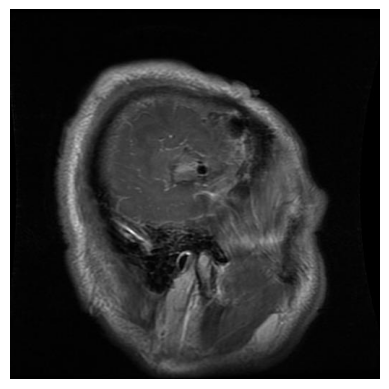

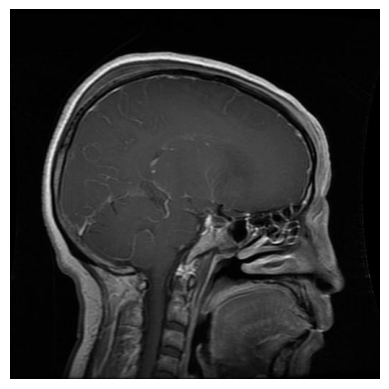

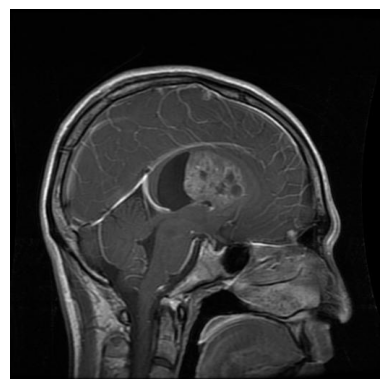

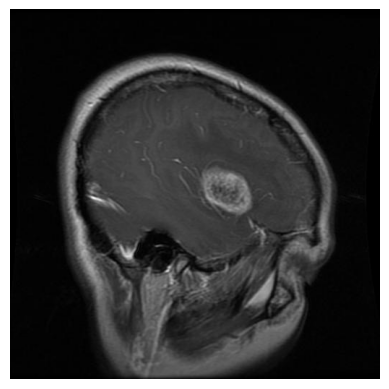

In [6]:
def get_image_paths(folder_path):
    image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')
    image_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.lower().endswith(image_extensions)]
    return image_paths

folder_path = '/kaggle/input/brain-tumor-mri-dataset/Training/glioma'
glioma_paths_ = get_image_paths(folder_path)

# Display each image
for path_ in glioma_paths_[:4]:
    img = tf.keras.utils.load_img(path=path_)
    plt.figure()  # Create a new figure for each image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

### sample images for "meningioma" condition

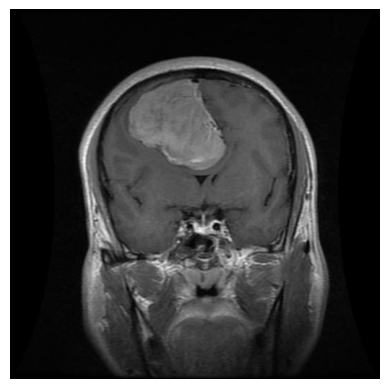

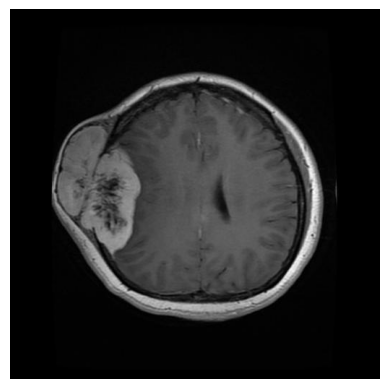

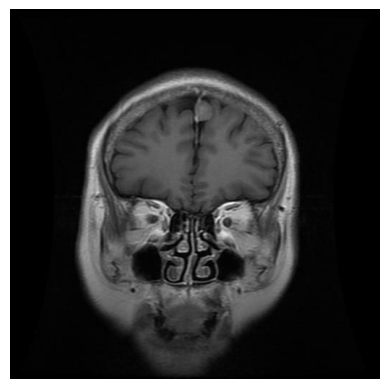

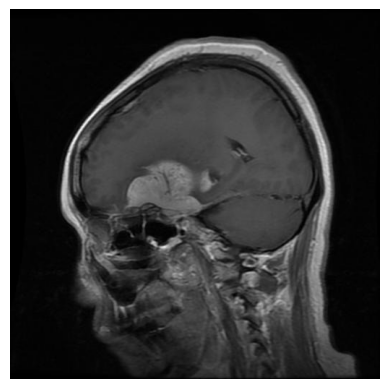

In [7]:
men_folder_path = '/kaggle/input/brain-tumor-mri-dataset/Training/meningioma'
men_paths_ = get_image_paths(men_folder_path)

# Display each image
for path_ in men_paths_[:4]:
    img = tf.keras.utils.load_img(path=path_)
    plt.figure()  # Create a new figure for each image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

### sample images for "notumor" condition

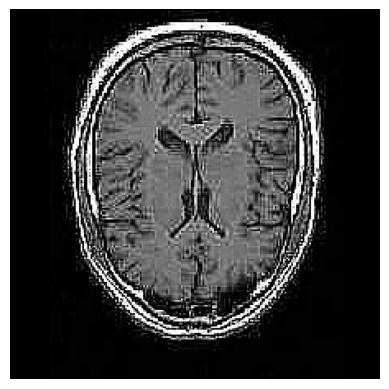

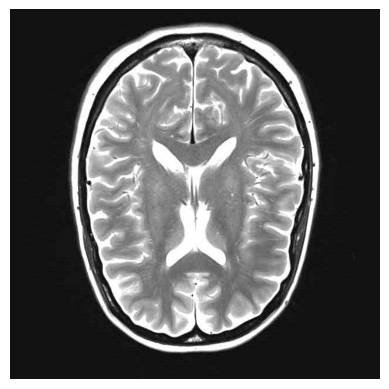

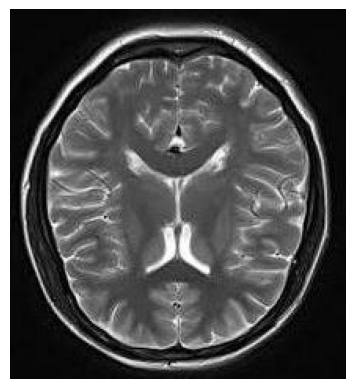

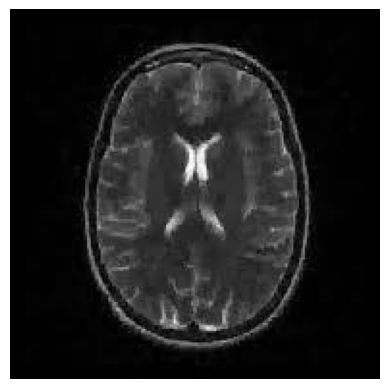

In [8]:
nt_folder_path = '/kaggle/input/brain-tumor-mri-dataset/Training/notumor'
nt_paths_ = get_image_paths(nt_folder_path)

# Display each image
for path_ in nt_paths_[:4]:
    img = tf.keras.utils.load_img(path=path_)
    plt.figure()  # Create a new figure for each image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

### sample images for 'pituitary' condition

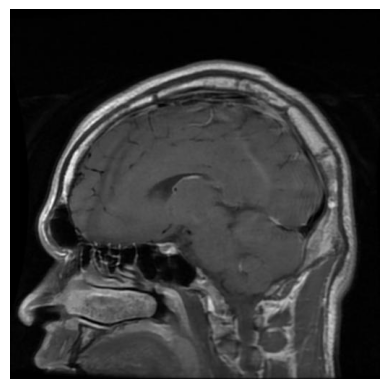

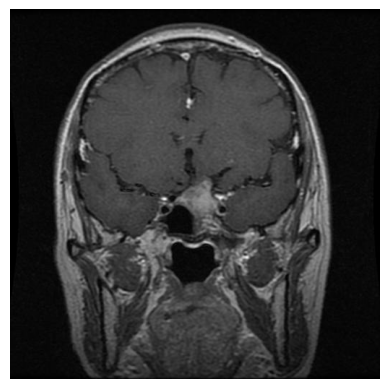

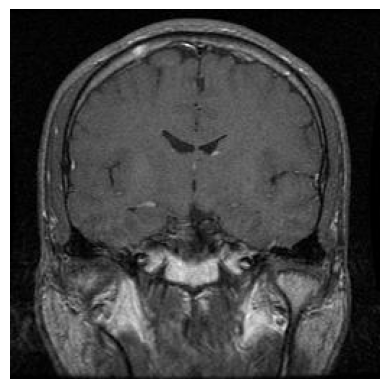

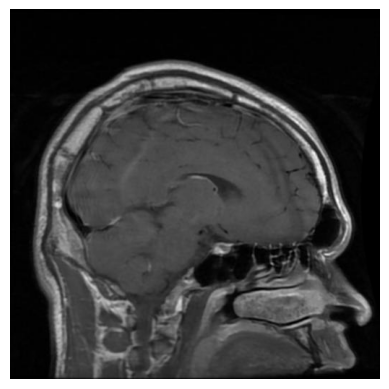

In [9]:
pt_folder_path = '/kaggle/input/brain-tumor-mri-dataset/Training/pituitary'
pt_paths_ = get_image_paths(pt_folder_path)

# Display each image
for path_ in pt_paths_[:4]:
    img = tf.keras.utils.load_img(path=path_)
    plt.figure()  # Create a new figure for each image
    plt.imshow(img)
    plt.axis('off') 
    plt.show()

### building the Model

In [11]:
# building the model
model = Sequential([
    Conv2D(256,(3,3),activation='relu',input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    
    Conv2D(256,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(256,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dropout(0.2),
    Dense(4,activation='softmax')
])

In [12]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])

In [13]:
hist = model.fit(train_data,epochs=10,validation_data = test_data )

Epoch 1/10
  1/179 ━━━━━━━━━━━━━━━━━━━━ 1:36:11 32s/step - accuracy: 0.1875 - loss: 1.3938

I0000 00:00:1721713229.316639     116 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


179/179 ━━━━━━━━━━━━━━━━━━━━ 102s 389ms/step - accuracy: 0.6057 - loss: 0.9287 - val_accuracy: 0.7780 - val_loss: 0.5374
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 30s 163ms/step - accuracy: 0.8717 - loss: 0.3549 - val_accuracy: 0.8642 - val_loss: 0.3893
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 30s 163ms/step - accuracy: 0.9154 - loss: 0.2259 - val_accuracy: 0.9230 - val_loss: 0.2570
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 30s 162ms/step - accuracy: 0.9596 - loss: 0.1214 - val_accuracy: 0.9008 - val_loss: 0.3221
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 30s 162ms/step - accuracy: 0.9735 - loss: 0.0848 - val_accuracy: 0.9291 - val_loss: 0.2213
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 30s 165ms/step - accuracy: 0.9743 - loss: 0.0791 - val_accuracy: 0.9458 - val_loss: 0.1719
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 29s 161ms/step - accuracy: 0.9883 - loss: 0.0351 - val_accuracy: 0.9550 - val_loss: 0.1787
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 30s 161ms/step - accuracy: 0.9945 - loss: 0.0178 - va

In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet152v2 (Functional)        │ (None, 7, 7, 2048)     │    58,331,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │       401,412 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,535,886 (227.11 MB)

 Trainable params: 401,412 (1.53 MB)

 Non-trainable params: 58,331,648 (222.52 MB)

 Optimizer params: 802,826 (3.06 MB)

In [14]:
train_data.class_indices

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

### let's save the model

In [15]:
model.save('braintm_model.keras')